In [86]:
#Mengimport Library

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [87]:
#Membaca Dataset

df1 = pd.read_csv('diabetes_latih.csv')
df2 = pd.read_csv('diabetes_uji.csv')

In [88]:
#Menampilkan Data Latih

df1.head()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
0,8,188,78,0,0,47.9,0.137,43,1
1,7,152,88,44,0,50.0,0.337,36,1
2,2,99,52,15,94,24.6,0.637,21,0
3,1,109,56,21,135,25.2,0.833,23,0
4,2,88,74,19,53,29.0,0.229,22,0


In [89]:
#Menampilkan Data Uji

df2.head()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
#menampilkan Informasi dari data Latih

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kehamilan   614 non-null    int64  
 1   Glukosa     614 non-null    int64  
 2   Darah       614 non-null    int64  
 3   LemakTubuh  614 non-null    int64  
 4   Insulin     614 non-null    int64  
 5   BMI         614 non-null    float64
 6   Riwayat     614 non-null    float64
 7   Umur        614 non-null    int64  
 8   Hasil       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [91]:
#menampilkan Informasi dari data Uji

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kehamilan   154 non-null    int64  
 1   Glukosa     154 non-null    int64  
 2   Darah       154 non-null    int64  
 3   LemakTubuh  154 non-null    int64  
 4   Insulin     154 non-null    int64  
 5   BMI         154 non-null    float64
 6   Riwayat     154 non-null    float64
 7   Umur        154 non-null    int64  
 8   Hasil       154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


In [92]:
#Jumlah Nilai hasil positif dan negatif pada data latih


df1.Hasil.value_counts()

0    400
1    214
Name: Hasil, dtype: int64

In [93]:
#Jumlah Nilai hasil positif dan negatif pada data uji

df2.Hasil.value_counts()

0    100
1     54
Name: Hasil, dtype: int64

<AxesSubplot:xlabel='Hasil', ylabel='count'>

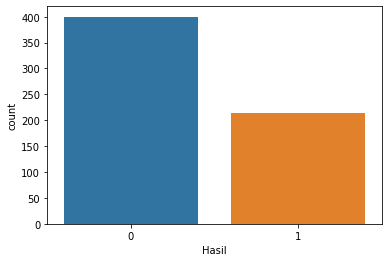

In [94]:
# visualisasi nilai hasil data latih

sns.countplot(data=df1, x='Hasil')

<AxesSubplot:xlabel='Hasil', ylabel='count'>

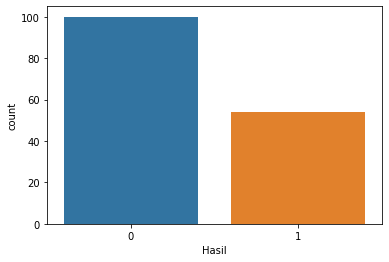

In [95]:
# visualisasi nilai hasil data uji

sns.countplot(data=df2, x='Hasil')

In [96]:
#isi kolom pada data latih

df1.columns

Index(['Kehamilan', 'Glukosa', 'Darah', 'LemakTubuh', 'Insulin', 'BMI',
       'Riwayat', 'Umur', 'Hasil'],
      dtype='object')

In [97]:
#isi kolom pada data uji

df2.columns

Index(['Kehamilan', 'Glukosa', 'Darah', 'LemakTubuh', 'Insulin', 'BMI',
       'Riwayat', 'Umur', 'Hasil'],
      dtype='object')

In [98]:
#mengecek apakah ada data yg kosong atau hilang data latih

df1.isnull().any().sum()

0

In [99]:
#menampilkan tabel max dan min pada data latih

df1.describe()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.785016,121.618893,69.149837,20.711726,80.684039,32.152280,0.474021,33.185668,0.348534
std,3.366572,31.981918,19.332592,15.911869,113.564110,7.565953,0.327744,11.817456,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.400000,0.240250,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,41.500000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.500000,0.637000,41.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,744.000000,67.100000,2.420000,81.000000,1.000000


In [100]:
#mengecek apakah ada data yg kosong atau hilang data uji

df2.isnull().any().sum()

0

In [101]:
#menampilkan tabel max dan min pada data uji

df2.describe()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.084416,118.006494,68.928571,19.837662,76.272727,31.355844,0.463325,33.461039,0.350649
std,3.381904,31.875472,19.510382,16.145365,122.034136,9.041755,0.346222,11.564614,0.478730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,97.500000,62.500000,0.000000,0.000000,26.650000,0.248000,24.000000,0.000000
50%,3.500000,113.000000,72.000000,23.000000,0.000000,32.450000,0.353500,30.000000,0.000000
75%,7.000000,139.000000,80.000000,32.000000,118.000000,36.600000,0.585250,40.750000,1.000000
max,15.000000,197.000000,122.000000,60.000000,846.000000,55.000000,2.288000,69.000000,1.000000


In [102]:
#mengubah nilai yang kosong menjadi nilai rata rata data latih

col=('Glukosa', 'Darah', 'LemakTubuh','Insulin', 'BMI')

for i in col:
    df1[i].replace(0,df1[i].mean(),inplace=True)

In [103]:
df1.describe()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.785016,122.411198,72.415872,26.682371,119.317765,32.466472,0.474021,33.185668,0.348534
std,3.366572,30.425283,11.698314,9.675574,90.992293,6.857573,0.327744,11.817456,0.476895
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.711726,80.684039,27.500000,0.240250,24.000000,0.000000
50%,3.000000,119.000000,72.000000,23.000000,80.684039,32.152280,0.378000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.500000,0.637000,41.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,744.000000,67.100000,2.420000,81.000000,1.000000


In [104]:
#mengubah nilai yang kosong menjadi nilai rata rata data uji

col=('Glukosa', 'Darah', 'LemakTubuh','Insulin', 'BMI')

for i in col:
    df2[i].replace(0,df2[i].mean(),inplace=True)

In [105]:
df2.describe()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.084416,118.772769,71.614100,26.278462,115.894923,32.373891,0.463325,33.461039,0.350649
std,3.381904,30.404574,13.677583,9.503277,101.342517,6.969920,0.346222,11.564614,0.478730
min,0.000000,44.000000,30.000000,10.000000,18.000000,19.100000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,19.837662,76.272727,27.675000,0.248000,24.000000,0.000000
50%,3.500000,113.500000,72.000000,23.000000,76.272727,32.450000,0.353500,30.000000,0.000000
75%,7.000000,139.000000,80.000000,32.000000,118.000000,36.600000,0.585250,40.750000,1.000000
max,15.000000,197.000000,122.000000,60.000000,846.000000,55.000000,2.288000,69.000000,1.000000


In [106]:
#Pembagian data X dan Y pada data latih

X1 = df1.drop('Hasil', axis=1)
y1 = df1['Hasil']

In [107]:
#Menampilkan X1 Data Latih

X1.head()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur
0,8,188.0,78.0,20.711726,80.684039,47.9,0.137,43
1,7,152.0,88.0,44.000000,80.684039,50.0,0.337,36
2,2,99.0,52.0,15.000000,94.000000,24.6,0.637,21
3,1,109.0,56.0,21.000000,135.000000,25.2,0.833,23
4,2,88.0,74.0,19.000000,53.000000,29.0,0.229,22


In [108]:
#Menampilkan y1 Data latih

y1.head()

0    1
1    1
2    0
3    0
4    0
Name: Hasil, dtype: int64

In [109]:
#Pembagian data X dan Y pada data Uji

X2 = df2.drop('Hasil', axis=1)
y2 = df2['Hasil']

In [110]:
#Menampilkan X2 Data Uji

X2.head()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur
0,6,148.0,72.0,35.000000,76.272727,33.6,0.627,50
1,1,85.0,66.0,29.000000,76.272727,26.6,0.351,31
2,8,183.0,64.0,19.837662,76.272727,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [111]:
#Menampilkan y2 Data Uji

y2.head()

0    1
1    0
2    1
3    0
4    1
Name: Hasil, dtype: int64

In [113]:
#Normalisasi Data Latih 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X1 = scaler.fit_transform(X1)
X1 = pd.DataFrame(X1)
X1.head()

,0,1,2,3,4,5,6,7
0,0.470588,0.923077,0.600000,0.149041,0.091348,0.607362,0.025192,0.366667
1,0.411765,0.671329,0.711111,0.402174,0.091348,0.650307,0.110589,0.250000
2,0.117647,0.300699,0.311111,0.086957,0.109589,0.130879,0.238685,0.000000
3,0.058824,0.370629,0.355556,0.152174,0.165753,0.143149,0.322374,0.033333
4,0.117647,0.223776,0.555556,0.130435,0.053425,0.220859,0.064475,0.016667


In [114]:
#Normalisasi Data Uji

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X2 = scaler.fit_transform(X2)
X2 = pd.DataFrame(X2)
X2.head()

,0,1,2,3,4,5,6,7
0,0.400000,0.679739,0.456522,0.500000,0.070378,0.403900,0.246028,0.604167
1,0.066667,0.267974,0.391304,0.380000,0.070378,0.208914,0.120744,0.208333
2,0.533333,0.908497,0.369565,0.196753,0.070378,0.116992,0.266455,0.229167
3,0.066667,0.294118,0.391304,0.260000,0.091787,0.250696,0.037222,0.000000
4,0.000000,0.607843,0.108696,0.500000,0.181159,0.668524,1.000000,0.250000


In [126]:
#mengganti nama data


x_train = X1 
x_test = y1 
y_train = X2 
y_test = y2

In [129]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [121]:
#MEMBUAT ALGORITMA K-NEAREST NEIGHBOR

knn = KNeighborsClassifier (n_neighbors=4)   #Klasifikasi KNN

In [122]:
knn.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [614, 154]